In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
#warnings.filterwarning('ignore')
%matplotlib inline

In [12]:
df_treino = pd.read_csv('diabetes/diabetes.csv')
df_treino.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df_treino.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
rs = np.random.RandomState(0)
corr = df_treino.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


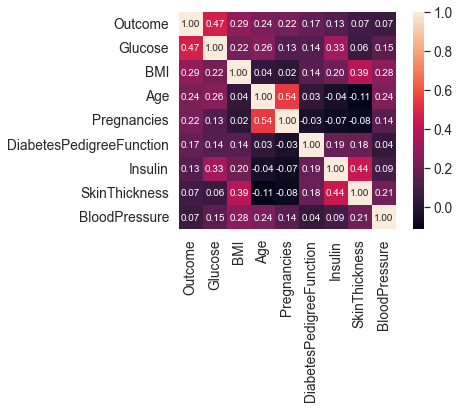

In [15]:
k = 15 #number of variables for heatmap
cols = corr.nlargest(k, 'Outcome')['Outcome'].index
cm = np.corrcoef(df_treino[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [36]:
y = df_treino['Outcome']
x = df_treino.drop(['Outcome','BloodPressure','SkinThickness'],axis=1)


In [42]:
from sklearn.model_selection import train_test_split

x_tr,x_test,y_tr,y_test = train_test_split(x,y,test_size = 0.2)

x_tr.shape, y_tr.shape, x_test.shape,y_test.shape

((614, 6), (614,), (154, 6), (154,))

In [43]:
#tipo de modelo1
resultado = []
from sklearn.ensemble import ExtraTreesClassifier

for i in range(10): #gera o modelo 10x
    modelo = ExtraTreesClassifier()
    modelo.fit(x_tr,y_tr)
    y_pred = (x_test)
    resultado.append(modelo.score(x_test,y_test))
print(np.mean(resultado))

0.7389610389610389


In [38]:
from sklearn.metrics import accuracy_score

#regressão logistica
from sklearn.linear_model import LogisticRegression
modelo2 = LogisticRegression()
modelo2.fit(x_tr,y_tr)
y_pred = modelo2.predict(x_test)
print(modelo2.score(x_test,y_test))
print(accuracy_score(y_test,y_pred))


0.7987012987012987
0.7987012987012987


In [39]:
from sklearn.tree import DecisionTreeClassifier
modelo3 = DecisionTreeClassifier()
modelo3.fit(x_tr,y_tr)
y_pred = modelo3.predict(x_test)
print(modelo3.score(x_test,y_test))

0.7272727272727273


In [40]:
from sklearn.ensemble import RandomForestClassifier
modelo4 = RandomForestClassifier()
modelo4.fit(x_tr,y_tr)
y_pred = modelo4.predict(x_test)
print(modelo4.score(x_test,y_test))

0.7467532467532467
